### Implementation of importance sampling for example 1.3 of the document entitled ''A brief introduction to Monte Carlo methods''. .

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
# Probability density function we want to approximate
def p(x):
    norm1 = norm(loc = 3, scale = 1)
    norm2 = norm(loc = -2, scale = 1)
    return 0.7 * norm1.pdf(x = x) + 0.3 * norm2.pdf(x = x)
# Importance probability density function
importanceDensity = norm(loc = 0, scale = 3)
def piPdf(importanceDistribution , x):
    return importanceDistribution.pdf(x = x)
# Importance probability density function samples
def piSample(importanceDistribution , nbSample):
    return importanceDistribution.rvs ( size = nbSample)
# Variables needed for the implementation
nbParticle = 30
xTilde = np.zeros(shape = nbParticle)
wTilde = np.zeros(shape = nbParticle)
wNormalizedTilde = np.zeros(shape = nbParticle)
# Algorithm
for i in range(0 , nbParticle , 1):
    xTilde[i] = piSample(importanceDistribution = importanceDensity, nbSample = 1)
    pTilde = p(x = xTilde[i])
    piTilde = piPdf(importanceDistribution = importanceDensity, x = xTilde[i])
    wTilde [i] = pTilde / piTilde
wSum = np.sum(wTilde)
for i in range(0 , nbParticle , 1):
    wNormalizedTilde[i] = wTilde [i] / wSum

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


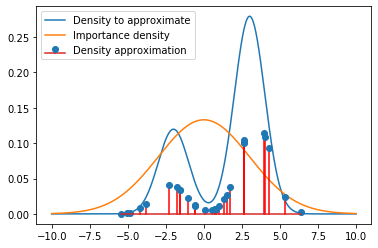

In [2]:
x = np.arange(-10, 10, 0.01)
yp = p(x)
ypi = piPdf(importanceDistribution = importanceDensity, x = x)
plt.plot(x, yp, label = 'Density to approximate')
plt.plot(x, ypi, label = 'Importance density')
plt.stem(xTilde, wNormalizedTilde, linefmt = 'red', label = 'Density approximation')
plt.legend()
plt.show()